In [12]:
from PIL import Image

import os
import models

repo = models.Repository.get(models.Repository.shortname == "ouhsc")

db = models.db

## CROP TESTS

In [7]:
from IPython.display import Image as PyImage
from IPython.display import display
from IPython.core.display import HTML

PATH = "001c8c0e-804c-5d99-be4e-e40f7bb1e6ce.jpg"
# display(PyImage(filename = PATH))

In [8]:
extracted_coords = [
    (1303, 783, 2123, 1626),
    (421, 729, 1232, 1570),
    (1315, 1759, 2090, 2555),
    (421, 1740, 1213, 2506),
]

In [9]:
extracted_coords

[(1303, 783, 2123, 1626),
 (421, 729, 1232, 1570),
 (1315, 1759, 2090, 2555),
 (421, 1740, 1213, 2506)]

In [10]:
def saveImageExtraction( image_path, box_coords ):
    
    TL_x, TL_y, BR_x, BR_y = box_coords
    
    print("saving %d %d %d %d"% box_coords)
    print(BR_x - TL_x)
    print(BR_y - TL_y)
    
    print(image_path.replace('.jpg', ".JPG"))
    
    im = Image.open(image_path)
    print(im.getbbox() )
    im = im.crop((TL_x, TL_y, BR_x, BR_y))
    display(im)
    im.save(image_path[:-4] + "_" + str(TL_x) + "-" + str(TL_y) + "-" + str(BR_x) + "-" + str(BR_y) + ".jpg" , "JPEG")
    
    return True

saving 1303 783 2123 1626
820
843
001c8c0e-804c-5d99-be4e-e40f7bb1e6ce.JPG
(0, 0, 3130, 4239)


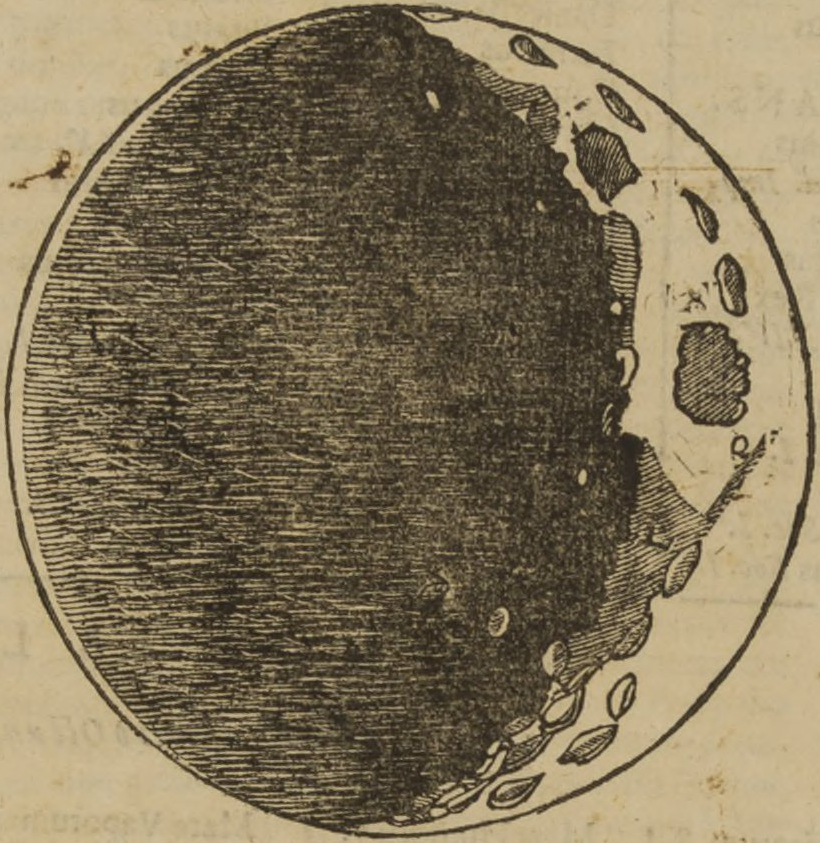

saving 421 729 1232 1570
811
841
001c8c0e-804c-5d99-be4e-e40f7bb1e6ce.JPG
(0, 0, 3130, 4239)


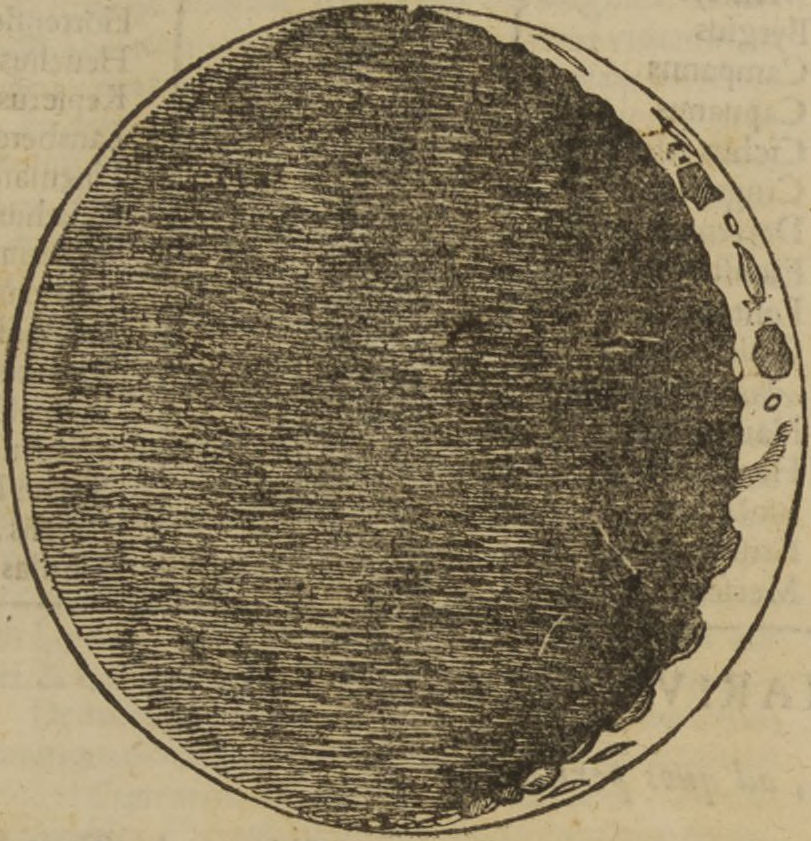

saving 1315 1759 2090 2555
775
796
001c8c0e-804c-5d99-be4e-e40f7bb1e6ce.JPG
(0, 0, 3130, 4239)


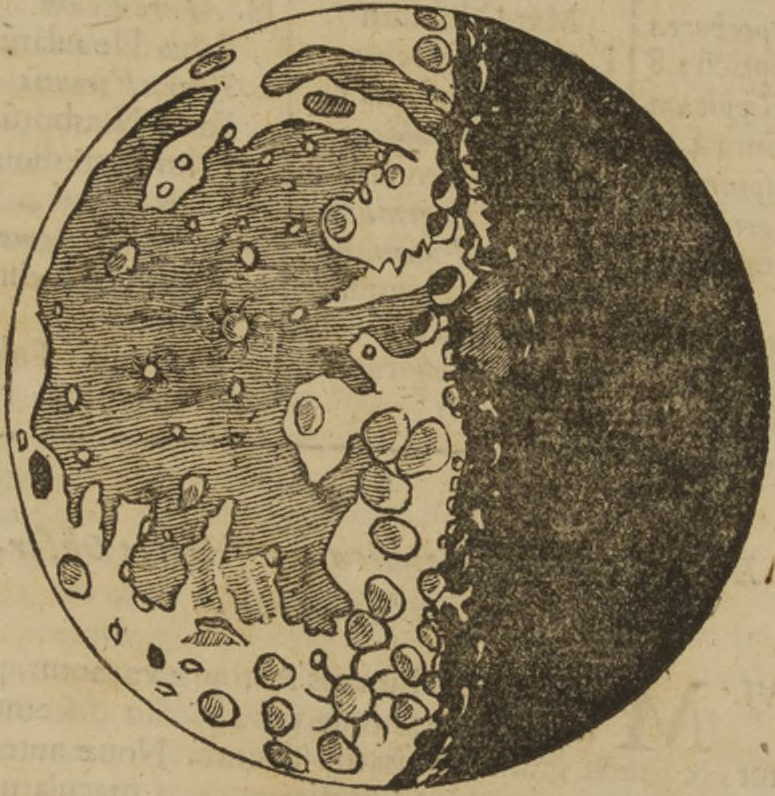

saving 421 1740 1213 2506
792
766
001c8c0e-804c-5d99-be4e-e40f7bb1e6ce.JPG
(0, 0, 3130, 4239)


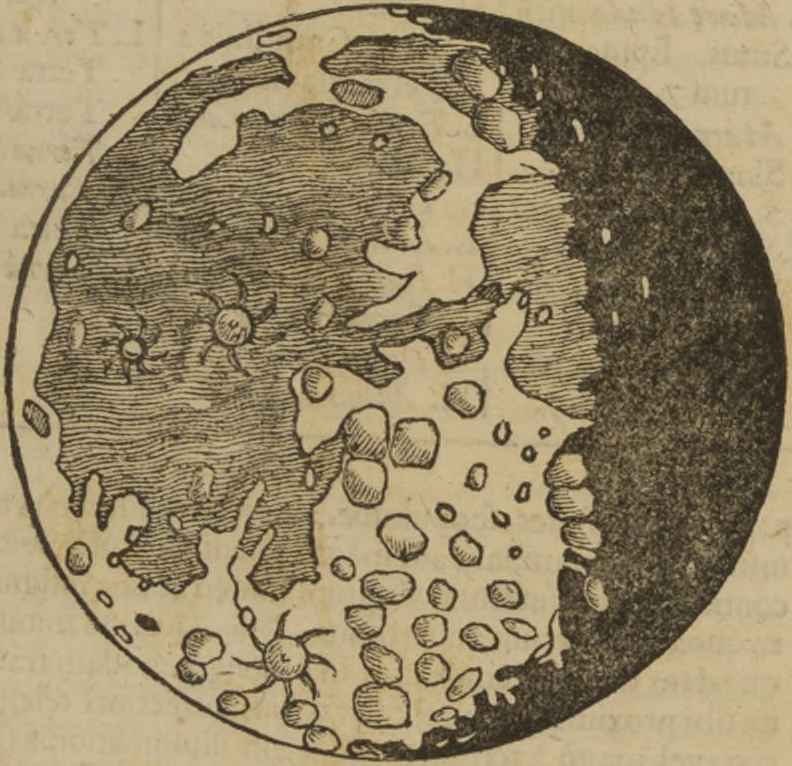

In [11]:
for extracted_coord in extracted_coords:
    saveImageExtraction(PATH, extracted_coord)

## Sanity Checks

In [ ]:
query = models.ExtractedImages.select().where(models.ExtractedImages.page_coordinate_TL_x == 0)

for extractedImage in query:

In [13]:
def showImageExtraction( image_path, box_coords ):
    
    TL_x, TL_y, BR_x, BR_y = box_coords
    
    im = Image.open(image_path)
    im = im.crop((TL_x, TL_y, BR_x, BR_y))
    display(im)
    
    return True